In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta

[*********************100%%**********************]  1 of 1 completed
C:\Users\suraj\AppData\Local\Temp\ipykernel_17092\231824391.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][data['Close'] < data['BB_Lower']] = 1  # Buy

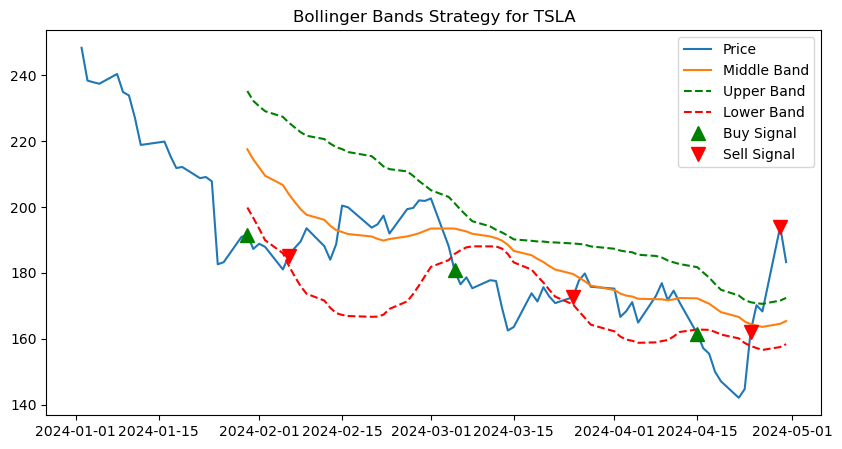

In [10]:
# Define the ticker symbol and timeframe
ticker_symbol = "TSLA"  # Example: Apple Inc.
start_date = "2024-01-01"
end_date = "2025-01-01"

# Fetch historical market data
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Calculate Bollinger Bands
bb_period = 20
bb_std = 2
data['BB_Middle'] = ta.volatility.bollinger_mavg(data['Close'], window=bb_period)
data['BB_Std'] = ta.volatility.bollinger_mavg(data['Close'], window=bb_period, fillna=True).rolling(bb_period).std()
data['BB_Upper'] = data['BB_Middle'] + bb_std * data['BB_Std']
data['BB_Lower'] = data['BB_Middle'] - bb_std * data['BB_Std']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Price')
plt.plot(data['BB_Middle'], label='Middle Band')
plt.plot(data['BB_Upper'], label='Upper Band', linestyle='--', color='g')
plt.plot(data['BB_Lower'], label='Lower Band', linestyle='--', color='r')

plt.title('Bollinger Bands Strategy for ' + ticker_symbol)
plt.legend()
plt.show()